<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [4]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [5]:
df.dropna(subset=["ConvertedComp"], axis=0, inplace=True)
df['ConvertedComp'].value_counts().head(20)

2000000.0    138
1000000.0    105
100000.0      99
150000.0      92
120000.0      86
110000.0      83
70000.0       81
130000.0      77
90000.0       77
80000.0       73
68745.0       71
140000.0      68
57287.0       68
85000.0       67
125000.0      65
60000.0       64
54996.0       62
105000.0      58
95000.0       58
45830.0       55
Name: ConvertedComp, dtype: int64

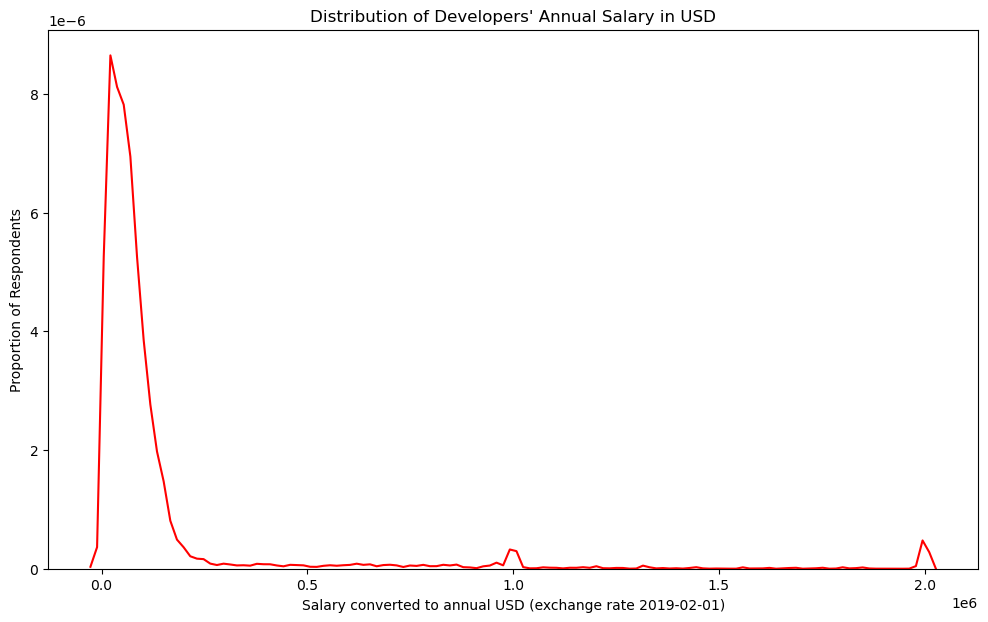

In [6]:
plt.figure(figsize=(12, 7))

sns.distplot(df['ConvertedComp'], hist=False, color="r")

plt.title('Distribution of Developers\' Annual Salary in USD')
plt.xlabel('Salary converted to annual USD (exchange rate 2019-02-01)')
plt.ylabel('Proportion of Respondents')

plt.show()
plt.close()

Plot the histogram for the column `ConvertedComp`.


[9659  238  115  125   99  131   34   15   15  151]
[      0.  200000.  400000.  600000.  800000. 1000000. 1200000. 1400000.
 1600000. 1800000. 2000000.]


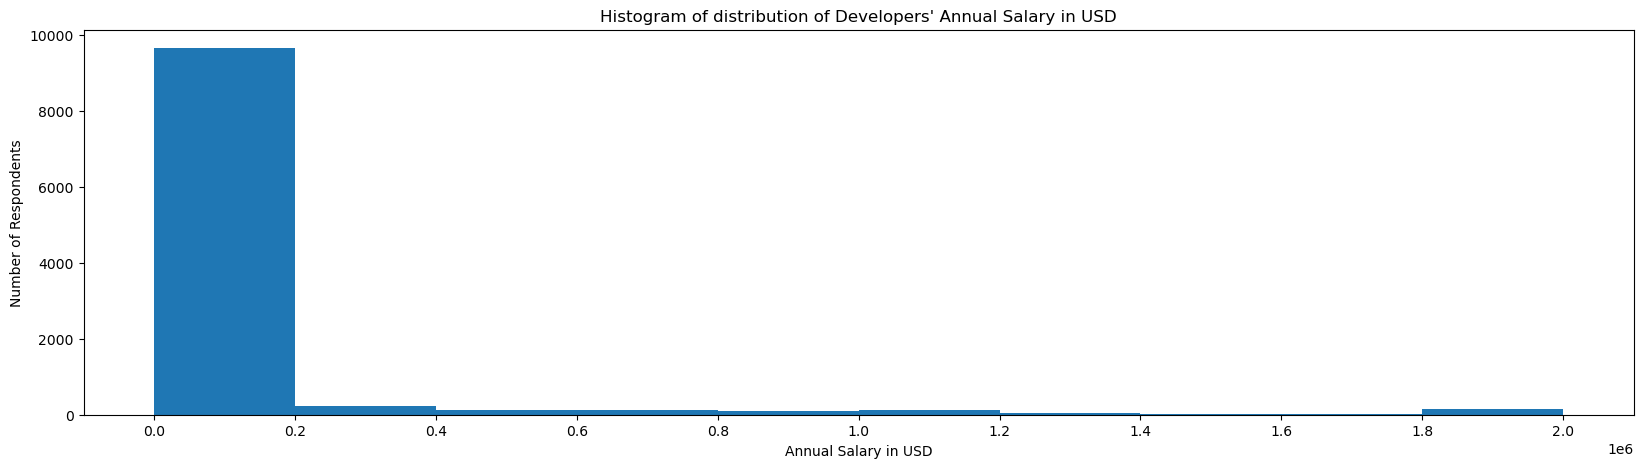

In [7]:
# your code goes here
count, bin_edges = np.histogram(df['ConvertedComp'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins
df['ConvertedComp'].plot(kind='hist', figsize=(20, 5), xticks=bin_edges)

plt.title('Histogram of distribution of Developers\' Annual Salary in USD') # add a title to the histogram
plt.ylabel('Number of Respondents') # add y-label
plt.xlabel('Annual Salary in USD') # add x-label

plt.show()

What is the median of the column `ConvertedComp`?


In [8]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [9]:
# your code goes here
df[df['Gender'] == 'Man'].shape[0]

9725

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
# your code goes here
df['ConvertedComp'][df['Gender'] == 'Woman'].median()

57708.0

Find out the median ConvertedComp of responders identified themselves only as a Man?

In [11]:
df['ConvertedComp'][df['Gender'] == 'Man'].median()

57744.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [12]:
# your code goes here
df.dropna(subset=["Age"], axis=0, inplace=True)
df['Age'].describe()

count    10354.000000
mean        30.833040
std          7.389983
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


Boxplot of Developers Age

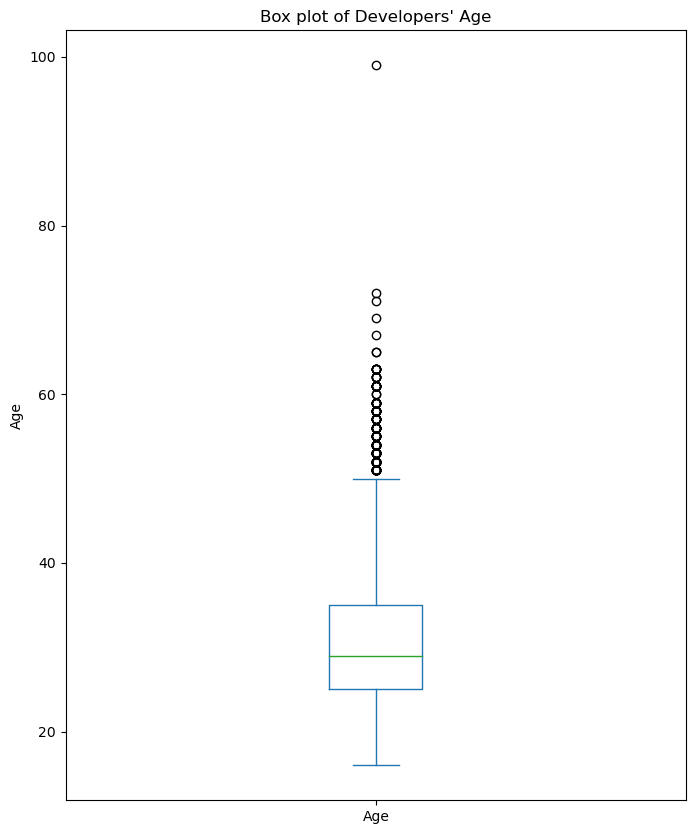

In [15]:
df['Age'].plot(kind='box', figsize=(8, 10))

plt.title('Box plot of Developers\' Age')
plt.ylabel('Age')

plt.show()

Plot a Histogram of Column Age

[1929 4968 2406  788  210   48    4    0    0    1]
[16.  24.3 32.6 40.9 49.2 57.5 65.8 74.1 82.4 90.7 99. ]


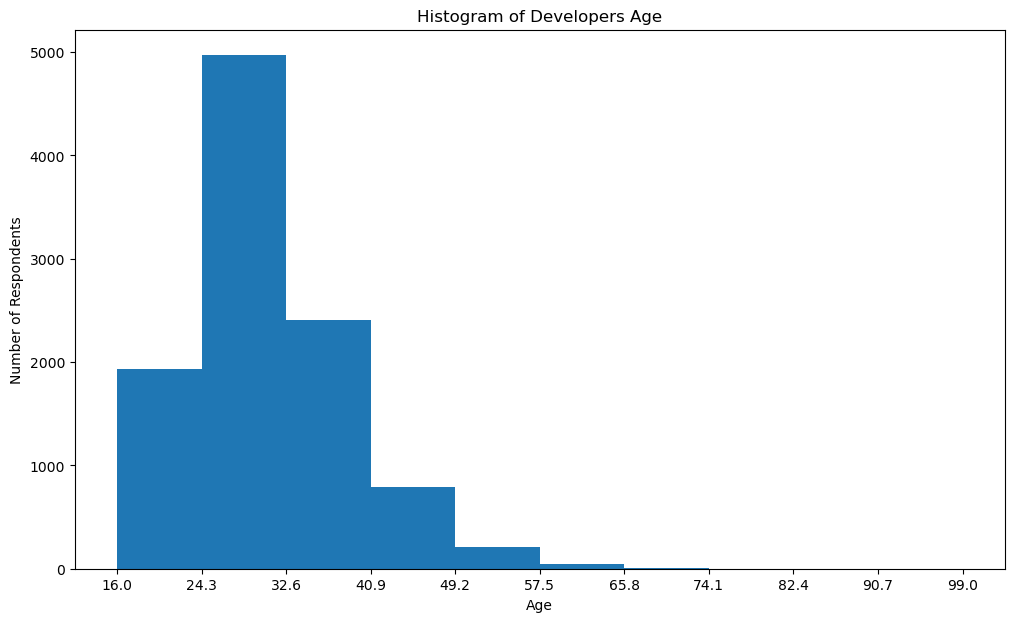

In [14]:
# your code goes here
count, bin_edges = np.histogram(df['Age'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins
df['Age'].plot(kind='hist', figsize=(12, 7), xticks=bin_edges)

plt.title('Histogram of Developers Age') # add a title to the histogram
plt.ylabel('Number of Respondents') # add y-label
plt.xlabel('Age') # add x-label

plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


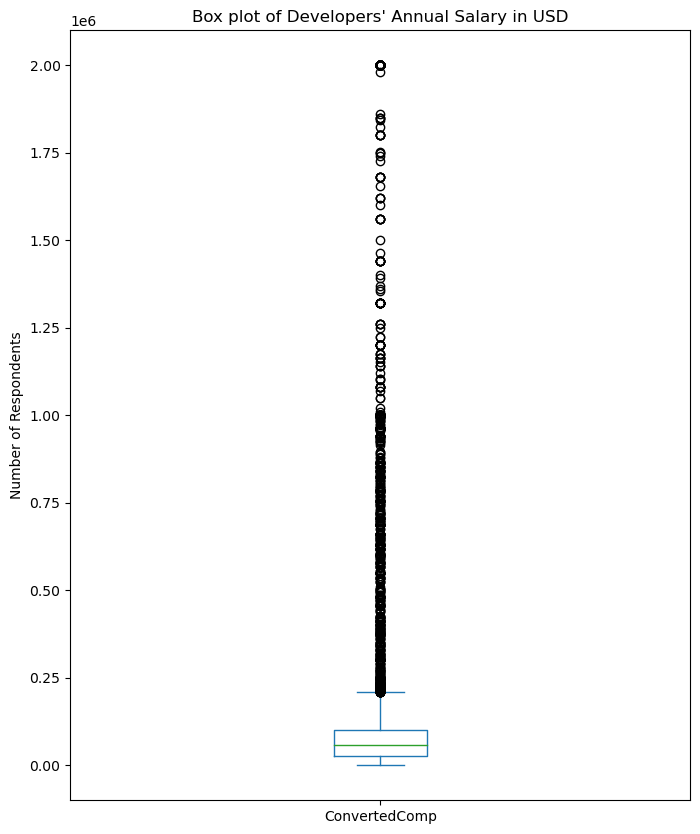

In [16]:
# your code goes here
df['ConvertedComp'].plot(kind='box', figsize=(8, 10))

plt.title('Box plot of Developers\' Annual Salary in USD')
plt.ylabel('Number of Respondents')

plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [17]:
# your code goes here
df['ConvertedComp'].describe()
# Q1(25%) = 2.683450e+04
# Q3(75%) = 1.000000e+05
# IQR = Q3 - Q1 = 1.000000e+05 - 2.683450e+04 = 73,165.5

count    1.035400e+04
mean     1.313593e+05
std      2.939787e+05
min      0.000000e+00
25%      2.683450e+04
50%      5.760000e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

Inter Quartile Range For the Column ConvertedComp


In [18]:
# your code goes here
IQR = df['ConvertedComp'].describe()[6] - df['ConvertedComp'].describe()[4]
IQR

73165.5

In [20]:
IQR_V = 1.5 * IQR
IQR_V

109748.25

Find the Upper and Lower Bounds

In [21]:
# your code goes here
lower = df['ConvertedComp'].describe()[4] - IQR_V
upper = df['ConvertedComp'].describe()[6] + IQR_V

print("Lower bound is:" , lower)
print("Upper bound is:" , upper)

Lower bound is: -82913.75
Upper bound is: 209748.25


Identify how many outliers are there in the `ConvertedComp` column.


In [22]:
# your code goes here
# Using the definition of outlier, any value that is greater than Q3 by 1.5 times or lower than Q1 1.5 times IQR will be flagged as outlier.
# Outlier > 1.000000e+05 + (1.5 * 73,165.5)
# Outlier > 209,748.25

df[(df['ConvertedComp'] > upper) | (df['ConvertedComp'] < lower)].shape[0]

861

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [23]:
# your code goes here
# your code goes here
df_new = df[df['ConvertedComp'] <= upper]
# df_new.drop(['level_0', 'index'], axis=1, inplace=True)
df_new

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11392,25134,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ecuador,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers,32.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,No,Appropriate in length,Easy
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer

In [24]:
df_new.median()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Respondent       12590.0
CompTotal        62500.0
ConvertedComp    52356.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 29.0
dtype: float64

In [27]:
df_new['ConvertedComp'].median()

52356.0

In [25]:
df_new.mean()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Respondent        12519.288844
CompTotal        732163.544190
ConvertedComp     59740.170441
WorkWeekHrs          41.895104
CodeRevHrs            4.717439
Age                  30.695860
dtype: float64

In [28]:
df_new['ConvertedComp'].mean()

59740.17044137786

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [26]:
# your code goes here
df_new.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019281,0.010916,-0.017491,0.004692,0.002180
CompTotal,-0.019281,1.000000,-0.063574,0.004667,0.015992,0.006337
ConvertedComp,0.010916,-0.063574,1.000000,0.033110,-0.086527,0.401821
WorkWeekHrs,-0.017491,0.004667,0.033110,1.000000,0.038948,0.032032
CodeRevHrs,0.004692,0.015992,-0.086527,0.038948,1.000000,-0.012878
Age,0.002180,0.006337,0.401821,0.032032,-0.012878,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
